In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [9]:
import requests
# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | harindanga
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | sakakah
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | bukene
Processing Record 8 of Set 1 | yumen
Processing Record 9 of Set 1 | dunda
Processing Record 10 of Set 1 | klaksvik
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | tucurui
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | ligayan
Processing Record 17 of Set 1 | noyabrsk
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | dingle
Processing Record 20 of Set 1 | vad
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 | sao filipe
Processing Record 23 of Set 1 | kaitangata
Processing Record 24

Processing Record 38 of Set 4 | barao de melgaco
Processing Record 39 of Set 4 | vryheid
Processing Record 40 of Set 4 | tura
Processing Record 41 of Set 4 | labrea
Processing Record 42 of Set 4 | buala
Processing Record 43 of Set 4 | partapur
Processing Record 44 of Set 4 | tuggurt
City not found. Skipping...
Processing Record 45 of Set 4 | tabulbah
City not found. Skipping...
Processing Record 46 of Set 4 | sioux lookout
Processing Record 47 of Set 4 | marystown
Processing Record 48 of Set 4 | hasaki
Processing Record 49 of Set 4 | ahipara
Processing Record 50 of Set 4 | gimli
Processing Record 1 of Set 5 | havelock
Processing Record 2 of Set 5 | inhambane
Processing Record 3 of Set 5 | vardo
Processing Record 4 of Set 5 | vostok
Processing Record 5 of Set 5 | egvekinot
Processing Record 6 of Set 5 | rawson
Processing Record 7 of Set 5 | necochea
Processing Record 8 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 5 | rantauprapat
Processing Record 10 of 

Processing Record 27 of Set 8 | raudeberg
Processing Record 28 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 29 of Set 8 | apud
Processing Record 30 of Set 8 | pleshanovo
Processing Record 31 of Set 8 | timra
Processing Record 32 of Set 8 | praia
Processing Record 33 of Set 8 | sabha
Processing Record 34 of Set 8 | carnarvon
Processing Record 35 of Set 8 | saint-ambroise
Processing Record 36 of Set 8 | sampit
Processing Record 37 of Set 8 | constantine
Processing Record 38 of Set 8 | wanning
Processing Record 39 of Set 8 | howard springs
Processing Record 40 of Set 8 | traverse city
Processing Record 41 of Set 8 | mujiayingzi
Processing Record 42 of Set 8 | raga
Processing Record 43 of Set 8 | namatanai
Processing Record 44 of Set 8 | douentza
Processing Record 45 of Set 8 | seydi
Processing Record 46 of Set 8 | soltsy
Processing Record 47 of Set 8 | saldanha
Processing Record 48 of Set 8 | nokha
Processing Record 49 of Set 8 | somova
Processing Record

Processing Record 13 of Set 12 | marau
Processing Record 14 of Set 12 | santa elena
Processing Record 15 of Set 12 | whitehorse
Processing Record 16 of Set 12 | ocos
Processing Record 17 of Set 12 | naze
Processing Record 18 of Set 12 | qabis
City not found. Skipping...
Processing Record 19 of Set 12 | waycross
Processing Record 20 of Set 12 | manta
Processing Record 21 of Set 12 | cullera
Processing Record 22 of Set 12 | biak
Processing Record 23 of Set 12 | yar-sale
Processing Record 24 of Set 12 | bilma
Processing Record 25 of Set 12 | belaya gora
Processing Record 26 of Set 12 | sete
Processing Record 27 of Set 12 | tatsinskaya
City not found. Skipping...
Processing Record 28 of Set 12 | ust-koksa
Processing Record 29 of Set 12 | teguldet
Processing Record 30 of Set 12 | tanout
Processing Record 31 of Set 12 | alihe
Processing Record 32 of Set 12 | saint george
Processing Record 33 of Set 12 | erattupetta
Processing Record 34 of Set 12 | luang prabang
Processing Record 35 of Set 12

In [13]:
len(city_data)

544

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,59.05,99,100,8.52,BR,2022-01-29 04:52:35
1,Harindanga,22.0383,88.3214,64.38,33,4,11.30,IN,2022-01-29 04:50:46
2,Atuona,-9.8000,-139.0333,77.61,78,12,13.20,PF,2022-01-29 04:52:35
3,Tuatapere,-46.1333,167.6833,67.82,55,100,2.21,NZ,2022-01-29 04:51:31
4,Sakakah,29.9697,40.2064,42.37,56,19,4.14,SA,2022-01-29 04:52:36


In [15]:
#reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed.
new_columns=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']
city_df=city_data_df[new_columns] 
city_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2022-01-29 04:52:35,-24.7911,-50.0119,59.05,99,100,8.52
1,Harindanga,IN,2022-01-29 04:50:46,22.0383,88.3214,64.38,33,4,11.30
2,Atuona,PF,2022-01-29 04:52:35,-9.8000,-139.0333,77.61,78,12,13.20
3,Tuatapere,NZ,2022-01-29 04:51:31,-46.1333,167.6833,67.82,55,100,2.21
4,Sakakah,SA,2022-01-29 04:52:36,29.9697,40.2064,42.37,56,19,4.14


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_df["Lat"]
max_temps = city_df["Max Temp"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind Speed"]

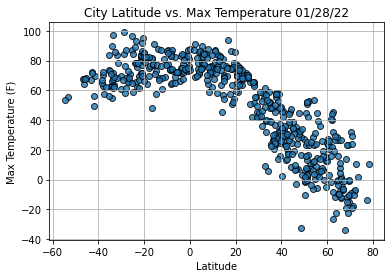

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

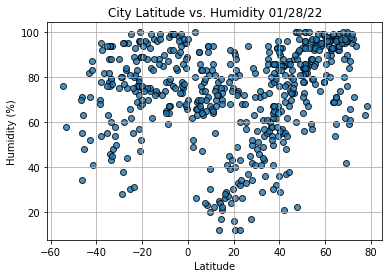

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
#plt.show()

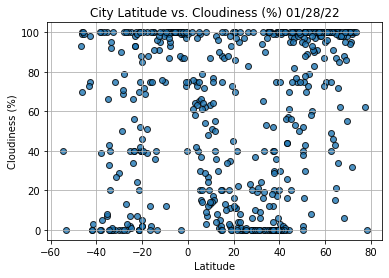

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
#plt.show()

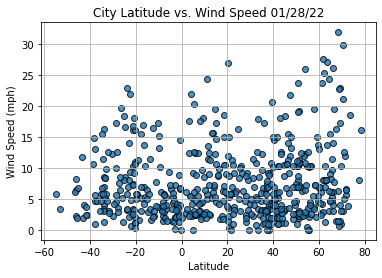

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
#plt.show()